# Градиентный спуск

## Аналитическое решение линейной регрессии

Для нахождения аналитического решения линейной регрессии используется следующий подход:

Исходная функция ошибки: $(x_i \cdot w - y_i)^2$

Производная функции ошибки (по правилу производной сложной функции): $2 \cdot (x_i \cdot w - y_i) \cdot x_i$

Вектор градиента функционала ошибки в матричной форме: $\nabla Q(w) = \frac{2}{n} X^T (X \cdot w - y)$

Затем уравнение градиента приравнивается к нулю:

$\frac{2}{n} X^T (X \cdot w - y) = 0$

Для упрощения уравнения, умножаем обе стороны на $\frac{n}{2}$:

$X^T (X \cdot w - y) = 0$

Раскрываем скобки и перенося член $X^T y$:

$X^T X \cdot w = X^T y$

Наконец, решаем уравнение относительно вектора весов $w$:

$w = (X^T X)^{-1} X^T y$

## Реализация в Python <a class="anchor" id="linear_regression_python"></a>

In [1]:
import numpy as np

## Линейная регрессия с циклами <a class="anchor" id="linear_regression"></a>

In [2]:
def predict(X, weights, bias):
    y_pred = bias
    
    for i in range(len(X)):
        y_pred += weights[i] * X[i]
    
    return y_pred

def linear_model(X, y, learning_rate=0.01, num_iterations=10):
    num_samples, num_features = X.shape
    weights = [0] * num_features
    bias = 0
    
    for _ in range(num_iterations):
        # Инициализация градиентов
        dw = [0] * num_features
        db = 0
        # Проход по каждому объекту 
        for i in range(num_samples):
            # Предсказание
            y_pred = predict(X[i], weights, bias)
            
            # Обновление градиентов
            error = y_pred - y[i]
            for j in range(num_features):
                dw[j] += error * X[i][j]
            db += error
        
        # Обновление весов и смещения
        for j in range(num_features):
            weights[j] -= (learning_rate * dw[j]) / num_samples
        bias -= (learning_rate * db) / num_samples
    
    return weights, bias

In [3]:
# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([6, 15, 24])

# Обучение модели
weights, bias = linear_model(X, y, num_iterations=10)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([10, 11, 12])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)

Веса: [0.8263654277742603, 0.9757570733131978, 1.1251487188521354]
Смещение: 0.14939164553893752
Предсказанное значение: 32.64815835595235


## Линейная регрессия с numpy <a class="anchor" id="linear_regression_numpy"></a>

In [4]:
def linear_model_numpy(X, y, learning_rate=0.01, num_iterations=10):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0

    for _ in range(num_iterations):
        # Предсказание
        y_pred = predict(X, weights, bias)

        # Обновление градиентов
        dw = np.dot(X.T, (y_pred - y)) / num_samples
        db = np.mean(y_pred - y)

        # Обновление весов и смещения
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

def predict(X, weights, bias):
    return np.dot(X, weights) + bias


In [5]:
# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([6, 15, 24])

# Обучение модели
weights, bias = linear_model_numpy(X, y)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([10, 11, 12])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)

Веса: [0.82636543 0.97575707 1.12514872]
Смещение: 0.14939164553893752
Предсказанное значение: 32.64815835595235


## Линейная регрессия с sklearn <a class="anchor" id="linear_regression_sklearn"></a>

In [6]:
from sklearn.linear_model import LinearRegression

# Пример данных
X = np.array([[1, 2, 3, 4, 5], [4, 5, 6, 7, 8], [7, 8, 9, 10, 11]])
y = np.array([15, 30, 45])

def predict(X, weights, bias):
    return np.dot(X, weights) + bias

model = LinearRegression()
model.fit(X, y)
weights = model.coef_
bias = model.intercept_

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([7, 8, 9, 10, 11])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)

Веса: [1. 1. 1. 1. 1.]
Смещение: 2.1316282072803006e-14
Предсказанное значение: 44.999999999999986


## Линейная регрессия с torch <a class="anchor" id="linear_regression_torch"></a>

Epoch [50/1000], Loss: 0.1888
Epoch [100/1000], Loss: 0.0388
Epoch [150/1000], Loss: 0.0244
Epoch [200/1000], Loss: 0.0214
Epoch [250/1000], Loss: 0.0196
Epoch [300/1000], Loss: 0.0181
Epoch [350/1000], Loss: 0.0168
Epoch [400/1000], Loss: 0.0156
Epoch [450/1000], Loss: 0.0146
Epoch [500/1000], Loss: 0.0137
Epoch [550/1000], Loss: 0.0130
Epoch [600/1000], Loss: 0.0123
Epoch [650/1000], Loss: 0.0118
Epoch [700/1000], Loss: 0.0113
Epoch [750/1000], Loss: 0.0109
Epoch [800/1000], Loss: 0.0105
Epoch [850/1000], Loss: 0.0102
Epoch [900/1000], Loss: 0.0099
Epoch [950/1000], Loss: 0.0097
Epoch [1000/1000], Loss: 0.0094


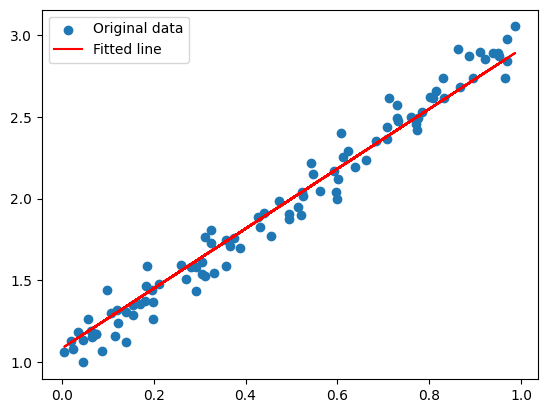

Обученные параметры:
linear.weight: [[1.8297185]]
linear.bias: [1.0844069]


In [15]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Создание синтетических данных
np.random.seed(42)
X = np.random.rand(100, 1)  # Входные данные
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)  # Выходные данные (с небольшим шумом)

# Преобразование данных в тензоры PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Определение модели линейной регрессии
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Один вход, один выход

    def forward(self, x):
        return self.linear(x)

# Инициализация модели
model = LinearRegression()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()  # Среднеквадратичная ошибка
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Стохастический градиентный спуск

# Обучение модели
num_epochs = 1000
for epoch in range(num_epochs):
    # Прямое распространение
    outputs = model(X)
    
    # Рассчитываем функцию потерь
    loss = criterion(outputs, y)
    
    # Обнуляем градиенты
    optimizer.zero_grad()
    
    # Обратное распространение и оптимизация
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Визуализация результатов
predicted = model(X).detach().numpy()
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted, label='Fitted line', color='r')
plt.legend()
plt.show()

# Получение обученных параметров
print("Обученные параметры:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data.numpy()}")